In [113]:
import os
import random as rn
from copy import copy

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

from model_utils import *
from preprocess import preprocess

In [2]:
random_seed = 12345
np.random.seed(random_seed)
set_seed_global(random_seed)

In [122]:
filename = "htt_features_test.pkl"
data_dict = preprocess(filename, enable_dicriminators=True, random_seed=random_seed)

In [123]:
y_true = data_dict["labels"][:]
X = data_dict["features"][:]

In [72]:
false_rates = [1.0, 0.999, 0.99, 0.98, 0.97, 0.96, 0.95, 0.92, 0.90, 0.8, 
               0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
auc_true = []
auc_test_true = []
auc_new = []
auc_test_new = []
rates = []
for false_rate in false_rates:
    np.random.seed(random_seed)
    y_new = copy(y_true)
    np.random.shuffle(y_new[:int(false_rate * y_new.shape[0])])
    print(false_rate)
    print(y_true[y_new == 1].mean())
    print(y_true[y_new == 0].mean())
    rates.append(y_true[y_new == 1].mean())
    model = train_xgb(X, y_new, "test_xgb_" + str(false_rate), random_seed=random_seed)
    _, X_test, _, y_test_new = train_test_split(X, y_new, random_state=random_seed)
    _, X_test, _, y_test_true = train_test_split(X, y_true, random_state=random_seed)
    pred_test = model.predict_proba(X_test)[:, 1]
    auc_test_true.append(roc_auc_score(y_test_true, pred_test))
    auc_test_new.append(roc_auc_score(y_test_new, pred_test))
    y_pred = model.predict_proba(X)[:, 1]
    print_results(y_true, y_pred, "test_xgb_" + str(false_rate), is_test=False)
    auc_true.append(roc_auc_score(y_true, y_pred))    
    auc_new.append(roc_auc_score(y_new, y_pred))

1.0
0.10212705615428247
0.10208299745268114
test_xgb_1.0 test accuracy 0.8986427016259786
test_xgb_1.0 test ROC AUC 0.49965374685840586
test_xgb_1.0 whole accuracy 0.8979125047048264
test_xgb_1.0 whole ROC AUC 0.42356405166230493
0.999
0.100850822461713
0.10222809789443137
test_xgb_0.999 test accuracy 0.8983184323898643
test_xgb_0.999 test ROC AUC 0.500595723901832
test_xgb_0.999 whole accuracy 0.8979096094270245
test_xgb_0.999 whole ROC AUC 0.42122547729833315
0.99
0.1133862733976177
0.10080288911101797
test_xgb_0.99 test accuracy 0.898376337610599
test_xgb_0.99 test ROC AUC 0.5059718651924703
test_xgb_0.99 whole accuracy 0.8979096094270245
test_xgb_0.99 whole ROC AUC 0.8929996175281479
0.98
0.1207033465683494
0.09997097991164995
test_xgb_0.98 test accuracy 0.8991985917450317
test_xgb_0.98 test ROC AUC 0.5091194229337065
test_xgb_0.98 whole accuracy 0.8979125047048264
test_xgb_0.98 whole ROC AUC 0.9321507107178209
0.97
0.1287861599546228
0.0990520104472318
test_xgb_0.97 test accuracy 

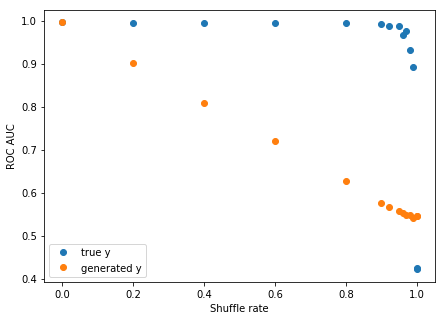

In [73]:
plt.figure(figsize=(7, 5))
plt.plot(false_rates, auc_true, 'o', label="true y")
plt.plot(false_rates, auc_new, 'o', label="generated y")
plt.ylabel("ROC AUC")
plt.xlabel("Shuffle rate")
plt.legend(loc=3)
plt.show()

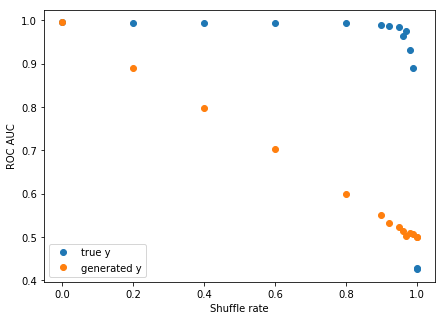

In [74]:
plt.figure(figsize=(7, 5))
plt.plot(false_rates, auc_test_true, 'o', label="true y")
plt.plot(false_rates, auc_test_new, 'o', label="generated y")
plt.ylabel("ROC AUC")
plt.xlabel("Shuffle rate")
plt.legend(loc=3)
plt.show()

In [124]:
auc_true_cols = {}
auc_new_cols = {}
for i, col in enumerate(data_dict['feature_names']):
    print(col)
    np.random.seed(random_seed)
    y_new = (X[:, i] > X[:, i].mean()).astype(int)
    X_tmp = np.delete(X, [i], axis=1)
    print("number of 1s in new y:", y_new.sum())
    print("number of 1s in true y:", y_true.sum())
    print("probability of 1 if new y is 1:", y_true[y_new == 1].mean())
    print("probability of 1 if new y is 0:", y_true[y_new == 0].mean())
    model = train_xgb(X_tmp, y_new, "xgb_on_new_" + col, random_seed=random_seed)
#     _, X_test, _, y_test_new = train_test_split(X, y_new, random_state=random_seed)
#     _, X_test, _, y_test_true = train_test_split(X, y_true, random_state=random_seed)
#     pred_test = model.predict_proba(X_test)[:, 1]
#     auc_test_true.append(roc_auc_score(y_test_true, pred_test))
#     auc_test_new.append(roc_auc_score(y_test_new, pred_test))
    y_pred = model.predict_proba(X_tmp)[:, 1]
    print_results(y_true, y_pred, "xgb_on_true_" + col, is_test=False)
    auc_true_cols[col] = roc_auc_score(y_true, y_pred)   
    auc_new_cols[col] = roc_auc_score(y_new, y_pred)

leg_2_DPFTau_2016_v1tauVSall
number of 1s in new y: 47623
number of 1s in true y: 35260.0
probability of 1 if new y is 1: 0.6173907565672049
probability of 1 if new y is 0: 0.019673100108474076
xgb_on_new_leg_2_DPFTau_2016_v1tauVSall test accuracy 0.9230671237318757
xgb_on_new_leg_2_DPFTau_2016_v1tauVSall test ROC AUC 0.9052855278564549
xgb_on_true_leg_2_DPFTau_2016_v1tauVSall whole accuracy 0.9815541851240627
xgb_on_true_leg_2_DPFTau_2016_v1tauVSall whole ROC AUC 0.9867371762877912
leg_2_byCombinedIsolationDeltaBetaCorrRaw3Hits
number of 1s in new y: 144684
number of 1s in true y: 35260.0
probability of 1 if new y is 1: 0.0
probability of 1 if new y is 0: 0.17567985012904447
xgb_on_new_leg_2_byCombinedIsolationDeltaBetaCorrRaw3Hits test accuracy 0.9981817760689303
xgb_on_new_leg_2_byCombinedIsolationDeltaBetaCorrRaw3Hits test ROC AUC 0.9999669502264914
xgb_on_true_leg_2_byCombinedIsolationDeltaBetaCorrRaw3Hits whole accuracy 0.47955933871855005
xgb_on_true_leg_2_byCombinedIsolationDel

xgb_on_new_leg_2_ptWeightedDetaStrip test accuracy 0.9138254505026173
xgb_on_new_leg_2_ptWeightedDetaStrip test ROC AUC 0.9741982995104564
xgb_on_true_leg_2_ptWeightedDetaStrip whole accuracy 0.5442311589797041
xgb_on_true_leg_2_ptWeightedDetaStrip whole ROC AUC 0.2169850127256206
leg_2_ptWeightedDphiStrip
number of 1s in new y: 141952
number of 1s in true y: 35260.0
probability of 1 if new y is 1: 0.04316247745716862
probability of 1 if new y is 0: 0.14320333467690402
xgb_on_new_leg_2_ptWeightedDphiStrip test accuracy 0.89489044332237
xgb_on_new_leg_2_ptWeightedDphiStrip test ROC AUC 0.9668447324060669
xgb_on_true_leg_2_ptWeightedDphiStrip whole accuracy 0.5305886099771273
xgb_on_true_leg_2_ptWeightedDphiStrip whole ROC AUC 0.24049881351788527
leg_2_ptWeightedDrIsolation
number of 1s in new y: 162203
number of 1s in true y: 35260.0
probability of 1 if new y is 1: 0.05479553399135651
probability of 1 if new y is 0: 0.14396218072243117
xgb_on_new_leg_2_ptWeightedDrIsolation test accurac

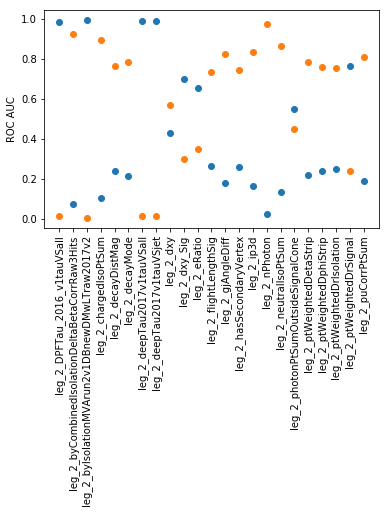

In [125]:
plt.plot(auc_true_cols.keys(), auc_true_cols.values(), 'o', 
         auc_true_cols.keys(), 1 - np.array(list(auc_true_cols.values())), 'o')
plt.xticks(rotation=90)
plt.ylabel("ROC AUC")
plt.show()

In [127]:
col = "leg_2_byIsolationMVArun2v1DBnewDMwLTraw2017v2"
i = 2
np.random.seed(random_seed)
y_new = (X[:, i] > X[:, i].mean()).astype(int)
X_tmp = np.delete(X, [i], axis=1)
print("number of 1s in new y:", y_new.sum())
print("number of 1s in true y:", y_true.sum())
print("probability of 1 if new y is 1:", y_true[y_new == 1].mean())
print("probability of 1 if new y is 0:", y_true[y_new == 0].mean())
model = train_xgb(X_tmp, y_new, "xgb_on_new_" + col, random_seed=random_seed)
y_pred = model.predict_proba(X_tmp)[:, 1]
print_results(y_true, y_pred, "xgb_on_true_" + col, is_test=False)

number of 1s in new y: 58820
number of 1s in true y: 35260.0
probability of 1 if new y is 1: 0.5876402584155049
probability of 1 if new y is 0: 0.0024252364169312906
xgb_on_new_leg_2_byIsolationMVArun2v1DBnewDMwLTraw2017v2 test accuracy 0.9766294529114745
xgb_on_new_leg_2_byIsolationMVArun2v1DBnewDMwLTraw2017v2 test ROC AUC 0.9963349658001052
xgb_on_true_leg_2_byIsolationMVArun2v1DBnewDMwLTraw2017v2 whole accuracy 0.9363096789136918
xgb_on_true_leg_2_byIsolationMVArun2v1DBnewDMwLTraw2017v2 whole ROC AUC 0.9941416372900836


ROC AUC score for old:  0.992395033222944
ROC AUC score for new:  0.9941416372900836


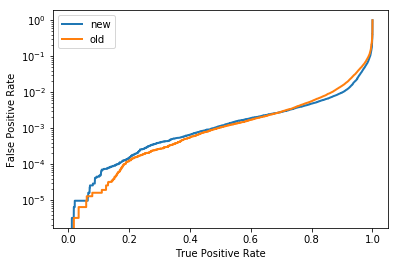

In [130]:
print('ROC AUC score for old: ', roc_auc_score(y_true, X[:, i]))
print('ROC AUC score for new: ', roc_auc_score(y_true, y_pred))
roc = roc_curve(y_true, y_pred)
plt.semilogy(roc[1], roc[0], linewidth=2, label="new")
roc = roc_curve(y_true, X[:, i])
plt.semilogy(roc[1], roc[0], linewidth=2, label="old")
# plt.xlim((0.2, 0.8))
# plt.ylim((1e-5, 1e-2))
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.legend()

In [131]:
data_dict['feature_names']

['leg_2_DPFTau_2016_v1tauVSall',
 'leg_2_byCombinedIsolationDeltaBetaCorrRaw3Hits',
 'leg_2_byIsolationMVArun2v1DBnewDMwLTraw2017v2',
 'leg_2_chargedIsoPtSum',
 'leg_2_decayDistMag',
 'leg_2_decayMode',
 'leg_2_deepTau2017v1tauVSall',
 'leg_2_deepTau2017v1tauVSjet',
 'leg_2_dxy',
 'leg_2_dxy_Sig',
 'leg_2_eRatio',
 'leg_2_flightLengthSig',
 'leg_2_gjAngleDiff',
 'leg_2_hasSecondaryVertex',
 'leg_2_ip3d',
 'leg_2_nPhoton',
 'leg_2_neutralIsoPtSum',
 'leg_2_photonPtSumOutsideSignalCone',
 'leg_2_ptWeightedDetaStrip',
 'leg_2_ptWeightedDphiStrip',
 'leg_2_ptWeightedDrIsolation',
 'leg_2_ptWeightedDrSignal',
 'leg_2_puCorrPtSum']